### Cancer Diagnostics with Keras (ANN)

### About Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np

# To create plots
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
#Loading data
train_df = pd.read_csv('/Users/saurabh/Documents/PythonData/data.csv')

In [3]:
train_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


###  Feature Engineering

In [4]:
train_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
train_df.shape

(569, 33)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
y = train_df.diagnosis

In [8]:
x = train_df.drop(['id','diagnosis','Unnamed: 32'] , axis=1)

In [9]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Analysis and Visualization

In [10]:
B,M = y.value_counts()
print('Number of Benign', B)
print('Number of Malignant', M)

Number of Benign 357
Number of Malignant 212


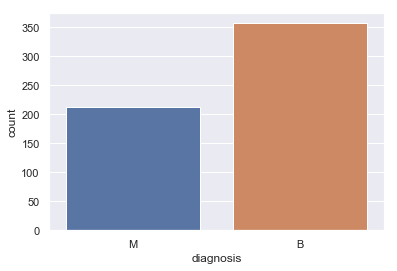

In [11]:
ax = sns.countplot(y,label="Count") 

- The above graph shows that there are more cases of Benign compared to Malignant tumor in the given data

In [12]:
data = x
data_graph = (data - data.mean()) /data.std() #standardization
data = pd.concat([y, data_graph.iloc[:,0:33]], axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

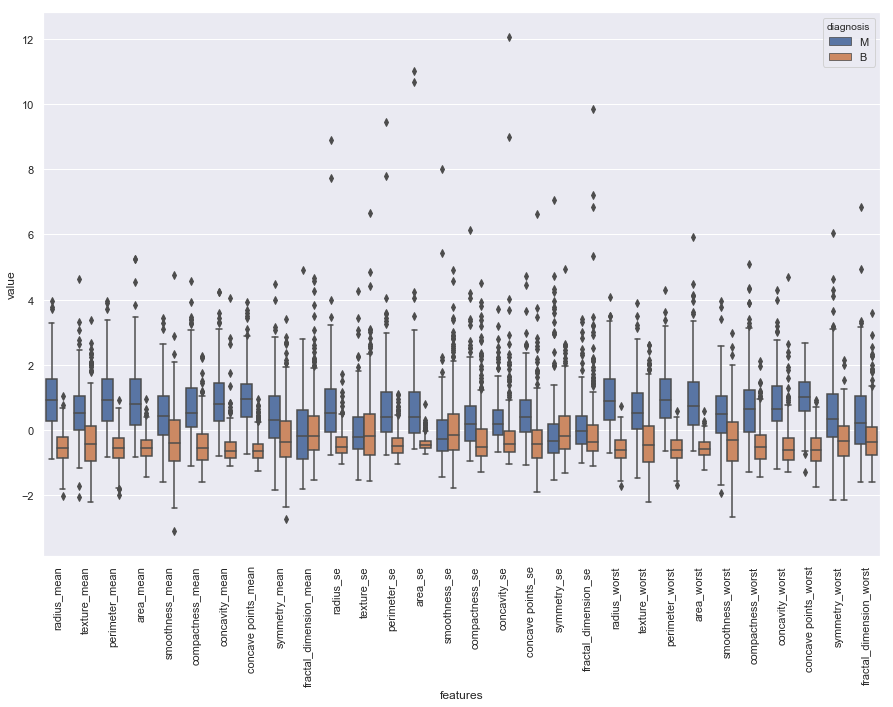

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

- There are outliers in all the features which are visible in the boxplot above

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

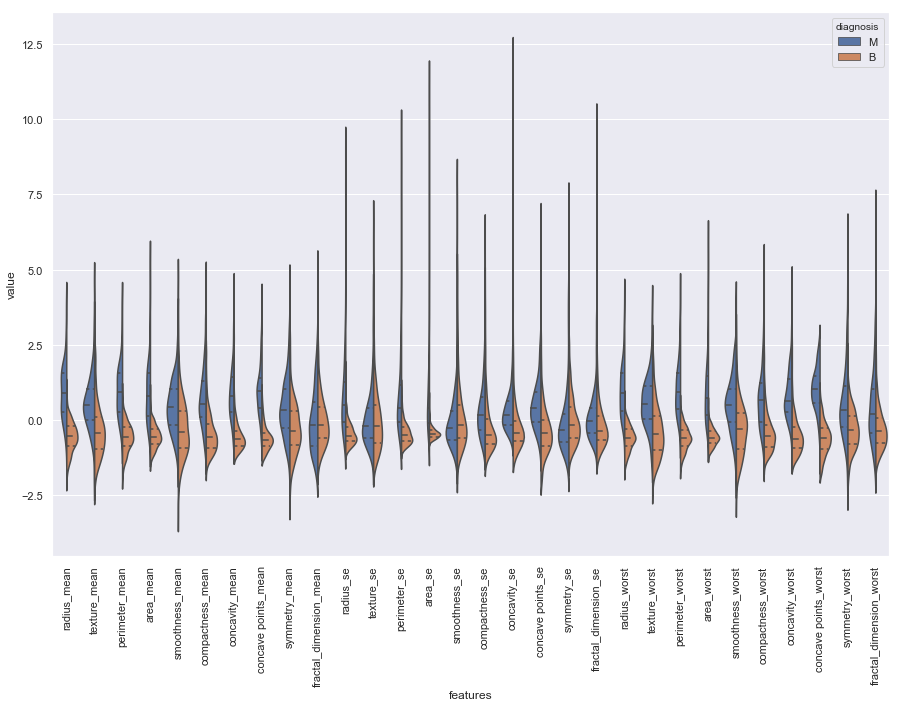

In [14]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

- The graph above shows that in features like 'texture_mean', 'compactness_mean', 'concavity_se', 'concavity_worst', median of the Malignant and Benign looks like separated so it can be good for classification. 
- However, in features like 'fractal_dimension_mean', 'smoothness_se' , median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

Text(0.5, 0, 'texture_mean')

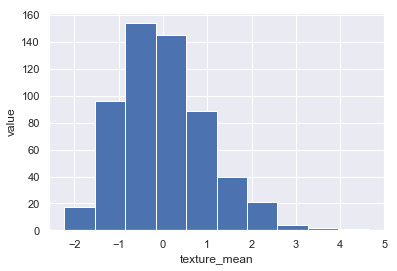

In [15]:
data[data.features == 'texture_mean']['value'].hist()
plt.ylabel('value')
plt.xlabel('texture_mean')

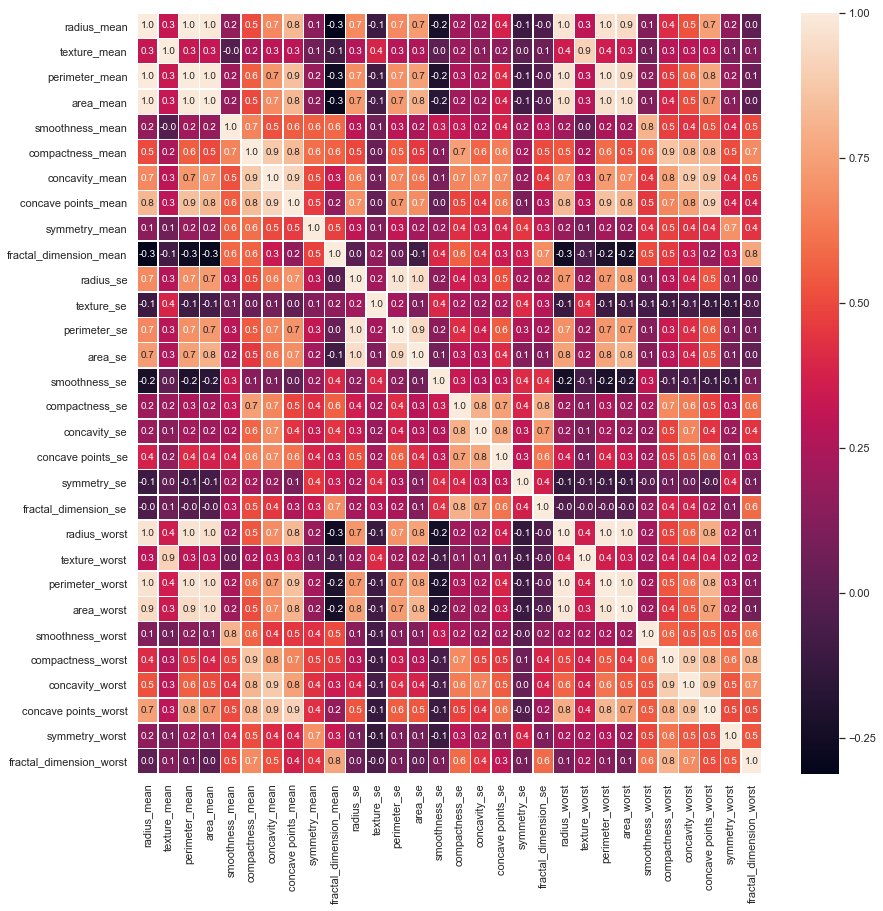

In [16]:
corrmat = x.corr()

#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

The above heat map shows that perimeter_mean, area_mean and radius_mean are related to each other while radius_se, perimeter_se, area_se are correlated. Similarly radius_worst, perimeter_worst, area_worst are also correlated.
Also 'compactness_worst', 'concavity_worst', 'concave points_worst' are also showing some correlation.

In [17]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,17.33,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,23.41,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,25.53,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,26.50,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,16.67,0.1374,0.4000,0.2364,0.07678


### Data Modeling

In [18]:
# Split training testing data
X_train, X_test, y_train, y_test = train_test_split(x_1, y, random_state=3)

In [19]:
## Run all the classification models
classifiers = [
    DecisionTreeClassifier(random_state=3),
    RandomForestClassifier(random_state=3),
    GradientBoostingClassifier(),
    KNeighborsClassifier(), # because there are 6 different labels
    SVC(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier()
]

names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df.sort_values(by='Score', ascending=False)

,Score
Model,
GradientBoostingClassifier,0.958042
XGBClassifier,0.951049
RandomForestClassifier,0.937063
DecisionTreeClassifier,0.930070
GaussianNB,0.930070
LogisticRegression,0.909091
KNeighborsClassifier,0.853147
SVC,0.643357


- GradientBoostingClassifier is winner compared to other models used for classification
- SVC performed poorly compared to other models

Let's try to improve performance of GradientBoostingClassifier by hyperparameter tunning

In [20]:
# A parameter grid for GradientBoostingClassifier
params = {'n_estimators':[100,200], 'max_depth': [10,20]}

# Initialize GradientBoostingClassifier and GridSearch
clf = GradientBoostingClassifier(random_state=3)

grid = GridSearchCV(clf, params, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200], 'max_depth': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [22]:
best_clf = grid.best_estimator_
score = accuracy_score(y_true=y_test, y_pred=best_clf.predict(X_test))
print('Accuracy on testset:\t{:.4f}\n'.format(score))

Accuracy on testset:	0.9441



In [23]:
# confusion_matrix
y_pred=best_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),columns = y_test.unique(), index= y_test.unique())

,B,M
B,86,4
M,4,49


In [24]:
# cross_val_score
cross_val_score(best_clf, X_train, y_train, cv=5)

array([1.        , 0.93023256, 0.91764706, 0.92941176, 0.95238095])

Let's try GradientBoostingClassifier without any hyperparameter tuning

In [25]:
gb_clf = GradientBoostingClassifier(random_state=3)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [26]:
score = accuracy_score(y_true=y_test, y_pred=gb_clf.predict(X_test))
print('Accuracy on testset:\t{:.4f}\n'.format(score))

Accuracy on testset:	0.9580



In [27]:
# confusion_matrix
y_pred=gb_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),columns = y_test.unique(), index= y_test.unique())

,B,M
B,87,3
M,3,50


As GradientBoostingClassifier is giving good performance without any performance tuning, so lets's try PCA if that helps to improve any performance

In [28]:
# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
model_data = pca.fit_transform(x)

# Split training testing data
X_pca__train, X_pca_test, y_pca_train, y_pca_test = train_test_split(model_data, y, random_state=3)

In [29]:
## Run all the classification models after PCA
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(7), # because there are 6 different labels
    SVC(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier()
]

names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_pca__train, y_pca_train)
    y_pca_pred = clf.predict(X_pca_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pca_pred, y_pca_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df.sort_values(by='Score', ascending=False)

,Score
Model,
XGBClassifier,0.902098
KNeighborsClassifier,0.888112
GaussianNB,0.888112
LogisticRegression,0.888112
GradientBoostingClassifier,0.874126
DecisionTreeClassifier,0.860140
RandomForestClassifier,0.853147
SVC,0.671329


- Accuracy of model is reduced as pca leads to loss of information which is not good for prediction
- Performance of GradientBoostingClassifier reduced significantly

As we tried supervised learning models above we are able to achieve 95% accuracy now lets try Keras with ANN

### Keras with ANN

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [31]:
X = train_df.drop(['id','diagnosis','Unnamed: 32'] , axis=1)

In [32]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Initialising the ANN
classifier = Sequential()

In [36]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

In [37]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

In [38]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

In [39]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)

Epoch 1/150
512/512 [==============================] - 0s - loss: 0.0470 - acc: 0.9883     
Epoch 2/150
512/512 [==============================] - 0s - loss: 0.0494 - acc: 0.9863     
Epoch 3/150
512/512 [==============================] - 0s - loss: 0.0482 - acc: 0.9883     
Epoch 4/150
512/512 [==============================] - 0s - loss: 0.0475 - acc: 0.9883     
Epoch 5/150
512/512 [==============================] - 0s - loss: 0.0461 - acc: 0.9902     
Epoch 6/150
512/512 [==============================] - 0s - loss: 0.0494 - acc: 0.9824     
Epoch 7/150
512/512 [==============================] - 0s - loss: 0.0457 - acc: 0.9902     
Epoch 8/150
512/512 [==============================] - 0s - loss: 0.0453 - acc: 0.9902     
Epoch 9/150
512/512 [==============================] - 0s - loss: 0.0444 - acc: 0.9902     
Epoch 10/150
512/512 [==============================] - 0s - loss: 0.0501 - acc: 0.9863     
Epoch 11/150
512/512 [==============================] - 0s - loss: 0.0506 - acc

512/512 [==============================] - 0s - loss: 0.0350 - acc: 0.9902     
Epoch 90/150
512/512 [==============================] - 0s - loss: 0.0392 - acc: 0.9883     
Epoch 91/150
512/512 [==============================] - 0s - loss: 0.0343 - acc: 0.9922     
Epoch 92/150
512/512 [==============================] - 0s - loss: 0.0347 - acc: 0.9922     
Epoch 93/150
512/512 [==============================] - 0s - loss: 0.0323 - acc: 0.9922     
Epoch 94/150
512/512 [==============================] - 0s - loss: 0.0353 - acc: 0.9922     
Epoch 95/150
512/512 [==============================] - 0s - loss: 0.0351 - acc: 0.9902     
Epoch 96/150
512/512 [==============================] - 0s - loss: 0.0347 - acc: 0.9902     
Epoch 97/150
512/512 [==============================] - 0s - loss: 0.0344 - acc: 0.9922     
Epoch 98/150
512/512 [==============================] - 0s - loss: 0.0347 - acc: 0.9922     
Epoch 99/150
512/512 [==============================] - 0s - loss: 0.0338 - acc: 0.

In [46]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [47]:
cm = confusion_matrix(y_test, y_pred)

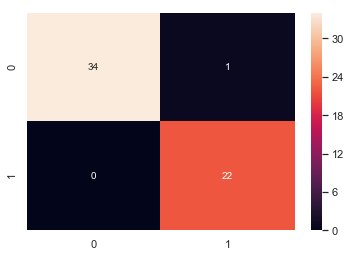

In [48]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [49]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 98.24561403508771%


### Conclusions

- As we tried supervised learning algorithms as well as Deep learning algorithm to check which machine learning models give significant accuracy
- Also compared to all supervised learning models for classification, GradientBoostingClassifier is giving very good performance of 95%
- Deep Learning models like ANN with Keras gives almost 98% accuracy so performance is much better but stll we have to check if there is overfitting or bias which can be removed to help model to perform better 